In [329]:
%matplotlib inline

# Assignment 1

**DUE: Sunday January 17, 2021 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [330]:
NAME = "Kenny Blum"
STUDENT_ID = "1641667"

## Problem 1 - Heart Disease Dataset

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we'll be using is derived from the Heart database from the UCI Machine Learning Repository.

In [331]:
# Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Read in the Data
This is much easier when you have the data on your own hard drive! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [332]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [333]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [334]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # Replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # Replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?
r,c = data.shape
print("%d rows x %d columns" % (r,c))

306 rows x 15 columns


Number of rows: 306

Number of columns: 15

### b) Understanding the Data Dictionary

Look for a data dictionary whenever you explore a new dataset. This is a codebook that tells you what each data item represents. The following is a data dictionary for this dataset, which is derived from one in the UCI Machine Learning Dataset Repository.

Age: The person's age in years

Sex: The person's sex (1 = male, 0 = female)

ChestPain: The chest pain experienced <br>
.............typical angina  <br>
.............atypical angina <br>
.............non-anginal pain  <br>
.............asymptomatic

RestBP: The person's resting blood pressure (mm Hg on admission to the hospital)

Chol: The person's cholesterol measurement in mg/dl

Fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

RestECG: Resting electrocardiographic measurement <br>
.............0: normal <br>
.............1: having ST-T wave abnormality <br>
.............2: showing probable left ventricular hypertrophy by Estes' criteria

MaxHR: The person's maximum heart rate achieved

ExAng: Exercise induced angina (1 = yes; 0 = no)

Oldpeak: ST depression induced by exercise relative to rest <br>
..............('ST' relates to positions on the ECG plot.)

Slope: the slope of the peak exercise ST segment <br>
...........1: upsloping <br>
...........2: flat <br>
...........3: downsloping

Ca: The number of major vessels (0-3)

Thal: A blood disorder called thalassemia <br>
...........normal <br>
...........fixed <br>
...........reversable

AHD: Heart disease ('No', 'Yes') -  The target we would like to predict.

In [335]:
# Show the first few rows of the data.
data.head()

Unnamed: 0  Age  Sex     ChestPain  ...  Slope   Ca        Thal  AHD
0           1   63    1       typical  ...      3  0.0       fixed   No
1           2   67    1  asymptomatic  ...      2  3.0      normal  Yes
2           3   67    1  asymptomatic  ...      2  2.0  reversable  Yes
3           4   37    1    nonanginal  ...      3  0.0      normal   No
4           5   41    0    nontypical  ...      1  0.0      normal   No

[5 rows x 15 columns]

In [336]:
# Print out the "info" of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. How many null values (missing values) exists in the data?

There are 6 null values in the data. There are 4 in the 'Ca' column, and 2 in the 'Thal' column.

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

Use the code cell below to drop null values from the data. [hint: you can use dropna() function]

In [337]:
# Drop any rows with missing data
data = data.dropna()

Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [338]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()

Unnamed: 0         Age         Sex  ...     Oldpeak       Slope          Ca
count  300.000000  300.000000  300.000000  ...  300.000000  300.000000  300.000000
mean   152.216667   55.036667    0.676667  ...    1.130333    1.610000    0.670000
std     88.235071   13.237299    0.468530  ...    1.645887    0.621171    0.936674
min      1.000000   29.000000    0.000000  ...    0.000000    1.000000    0.000000
25%     75.750000   47.750000    0.000000  ...    0.000000    1.000000    0.000000
50%    151.500000   56.000000    1.000000  ...    0.800000    2.000000    0.000000
75%    228.250000   61.000000    1.000000  ...    1.800000    2.000000    1.000000
max    306.000000  222.000000    1.000000  ...   21.200000    3.000000    3.000000

[8 rows x 12 columns]

Outliers are values far removed from the other data values, and are usually typos or other errors. Looking at the data description above, do you spot any possible outliers in the data?

Definitely, Age seems like there is an outlier. How can the max be 222 for somebody's age? RestBP also seems like a potential outlier since it has a maximum of 2444, yet a mean of 139.

### c) Outlier Detection \& Elimination
In this section, We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this: 

1) You'll make a new column called AgeZ to hold the z-transformed values of the Age column. 


2) Then, any AgeZ value that's less than -4 or more than 4 should be flagged as an outlier. 


3) Remove those entries from the dataset.

Remember that standardizing the data (or z-transform) is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.


In [339]:
def standardize(data, col):
  data[col+'_Z'] = (data[col] - data[col].mean()) / data[col].std()
  indexes = data[abs(data[col+'_Z']) > 4.0].index
  data.drop(indexes, inplace=True)
  data = data.drop(columns=[col+'_Z'])
  return data

data = standardize(data, 'Age')

# Let's take another look.
data.describe()

Unnamed: 0         Age         Sex  ...     Oldpeak       Slope          Ca
count  299.000000  299.000000  299.000000  ...  299.000000  299.000000  299.000000
mean   151.705686   54.478261    0.675585  ...    1.124749    1.605351    0.672241
std     87.937251    9.052904    0.468941  ...    1.645797    0.616962    0.937438
min      1.000000   29.000000    0.000000  ...    0.000000    1.000000    0.000000
25%     75.500000   47.500000    0.000000  ...    0.000000    1.000000    0.000000
50%    151.000000   56.000000    1.000000  ...    0.800000    2.000000    0.000000
75%    227.500000   61.000000    1.000000  ...    1.700000    2.000000    1.000000
max    306.000000   77.000000    1.000000  ...   21.200000    3.000000    3.000000

[8 rows x 12 columns]

Notice that now the Age column is much more reasonable.  

Perform the same process to eliminate any extreme outliers (more than 4 standard deviations away from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [340]:
for column in ['RestBP', 'MaxHR', 'Oldpeak']:
  data = standardize(data, column)

# Leave this for your last line.
data.describe()

Unnamed: 0         Age         Sex  ...     Oldpeak       Slope          Ca
count  295.000000  295.000000  295.000000  ...  295.000000  295.000000  295.000000
mean   151.294915   54.532203    0.681356  ...    1.036271    1.596610    0.671186
std     87.248284    9.066167    0.466742  ...    1.130351    0.614442    0.931507
min      1.000000   29.000000    0.000000  ...    0.000000    1.000000    0.000000
25%     75.500000   48.000000    0.000000  ...    0.000000    1.000000    0.000000
50%    151.000000   56.000000    1.000000  ...    0.800000    2.000000    0.000000
75%    226.500000   61.000000    1.000000  ...    1.600000    2.000000    1.000000
max    302.000000   77.000000    1.000000  ...    5.600000    3.000000    3.000000

[8 rows x 12 columns]

### d) Data Visualization

Sometimes it's useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

In [341]:
# Make a pairplot of all the variables (columns), excepting the first column.
#plt.rcParams['figure.figsize'] = (15, 15)
#sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

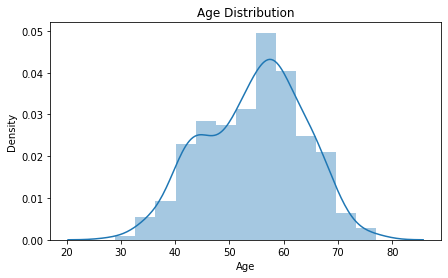

In [342]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

Plot the distribution of patient cholesterol levels.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Distribution')

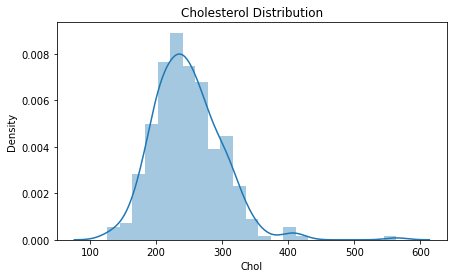

In [343]:
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Chol'])
plt.title('Cholesterol Distribution')

### e) Data Normalization

We've already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

Let's create a new column ('NewAge') mapping all ages into the interval $[0,1]$.

In [344]:
# Create a new column, NewAge, to hold the normalized Age variable.
data['NewAge'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

# Take a look at the new age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: NewAge, Length: 295, dtype: float64

In [345]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

Map the minimum to 0 and maximum to 1 (in other words, normalize the column) for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [346]:
def normalize(data, col):
  data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
  return data

for column in ['RestBP', 'Chol', 'MaxHR']:
  data = normalize(data, column)

# Leave this for your last line.
#data.describe()
data.head()

Unnamed: 0  Age  Sex     ChestPain  ...  Slope   Ca        Thal  AHD
0           1   63    1       typical  ...      3  0.0       fixed   No
1           2   67    1  asymptomatic  ...      2  3.0      normal  Yes
2           3   67    1  asymptomatic  ...      2  2.0  reversable  Yes
3           4   37    1    nonanginal  ...      3  0.0      normal   No
4           5   41    0    nontypical  ...      1  0.0      normal   No

[5 rows x 15 columns]

### f) Converting Categorical Data to Numeric Values

It's frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [347]:
def YN_convert(Y_or_N): return 1 if Y_or_N == 'Yes' else 0

data['AHD'] = data['AHD'].apply(YN_convert)
data.head()

Unnamed: 0  Age  Sex     ChestPain  ...  Slope   Ca        Thal  AHD
0           1   63    1       typical  ...      3  0.0       fixed    0
1           2   67    1  asymptomatic  ...      2  3.0      normal    1
2           3   67    1  asymptomatic  ...      2  2.0  reversable    1
3           4   37    1    nonanginal  ...      3  0.0      normal    0
4           5   41    0    nontypical  ...      1  0.0      normal    0

[5 rows x 15 columns]

### g) One-Hot-Encoding

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the sklearn package.

Similar to what you've learned from the class exercise of lecture 2, add new columns for one-hot-encoding of 'Thal' column. Use 'Thal' as the prefix. Then drop the original column.

In [348]:
# Concatentate new one-hot encodings with the original dataframe.
data = pd.concat([data,pd.get_dummies(data['Thal'], prefix='Thal')],axis=1)

# now drop the original 'Thal' column (you don't need it anymore)
data = data.drop(columns=['Thal'])

data.head()

Unnamed: 0  Age  Sex  ... Thal_fixed  Thal_normal  Thal_reversable
0           1   63    1  ...          1            0                0
1           2   67    1  ...          0            1                0
2           3   67    1  ...          0            0                1
3           4   37    1  ...          0            1                0
4           5   41    0  ...          0            1                0

[5 rows x 17 columns]

Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [349]:
data = pd.concat([data,pd.get_dummies(data['ChestPain'], prefix='ChestPain')],axis=1)
data = data.drop(columns=['ChestPain'])

# Leave this for your last line.
data.head()

Unnamed: 0  Age  ...  ChestPain_nontypical  ChestPain_typical
0           1   63  ...                     0                  1
1           2   67  ...                     0                  0
2           3   67  ...                     0                  0
3           4   37  ...                     0                  0
4           5   41  ...                     1                  0

[5 rows x 20 columns]

### h) Feature Engineering

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [350]:
data['AgeC'] = data['Age'] * data['Chol']

# Leave this for your last line.
data.head()

Unnamed: 0  Age  Sex  ...  ChestPain_nontypical  ChestPain_typical       AgeC
0           1   63    1  ...                     0                  1  15.390411
1           2   67    1  ...                     0                  0  24.474886
2           3   67    1  ...                     0                  0  15.755708
3           4   37    1  ...                     0                  0  10.474886
4           5   41    0  ...                     1                  0   7.301370

[5 rows x 21 columns]

###  i) Balanced or Unbalanced Classes

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of subjects were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Use the code cell below to see if the data is imbalanced or not and describe your observations in the next text cell

In [369]:
avg = data['AHD'].mean()
total = len(data['AHD'])
AHD = avg * total
print("Patients with AHD:    %d\t(%2.2f percent)" % (AHD, AHD / total))
print("Patients without AHD: %d\t(%2.2f percent)" % (total - AHD, (total - AHD) / total))

Patients with AHD:    136	(0.46 percent)
Patients without AHD: 159	(0.54 percent)


Clearly, as displayed above, the data for AHD is relatively balanced. Therefore, it would not be statistically accurate for a machine learning model to ALWAYS predict AHD or not.